In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

# Cargar el dataset de Iris
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='species')

# Visualizar las primeras filas del dataset
print(X.head())
print(y.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64


In [2]:
print("Valores nulos en X:")
print(X.isnull().sum())
print("Valores nulos en y:")
print(y.isnull().sum())


Valores nulos en X:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64
Valores nulos en y:
0


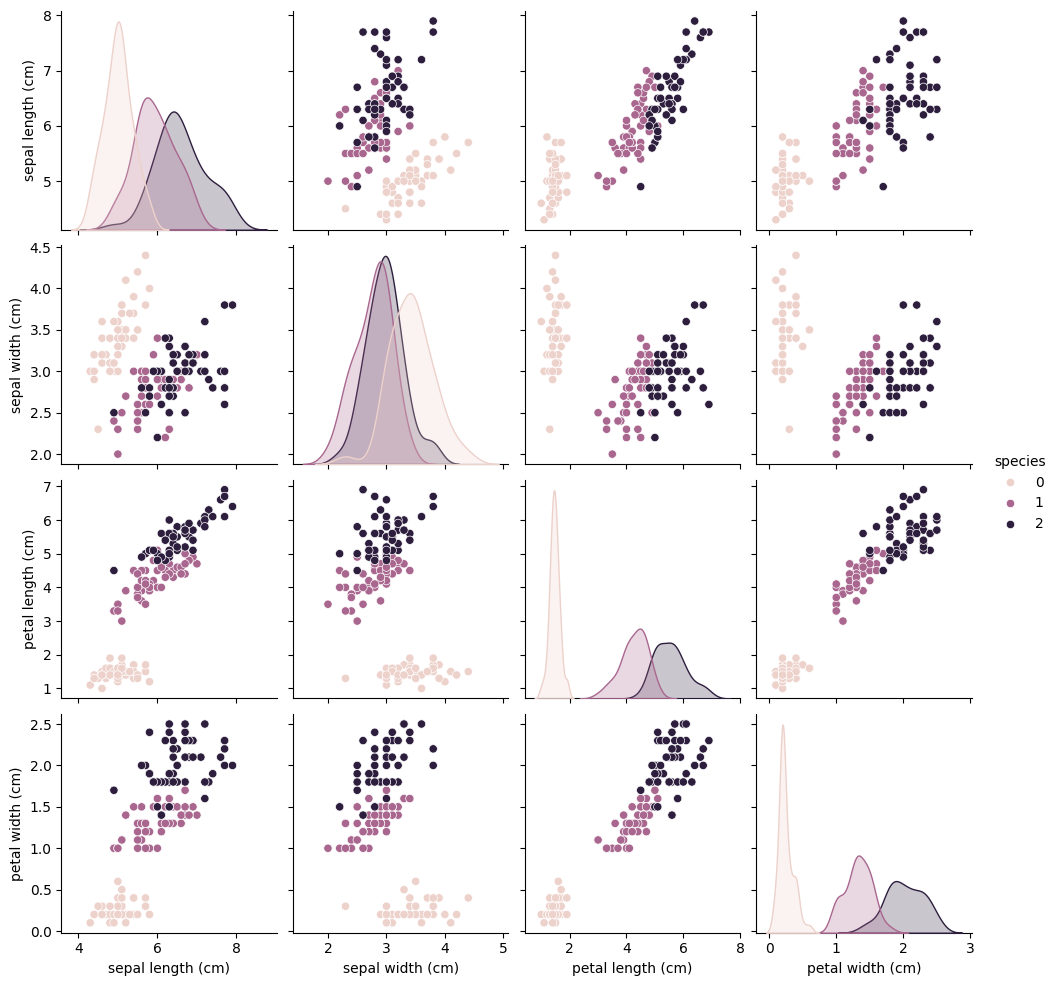

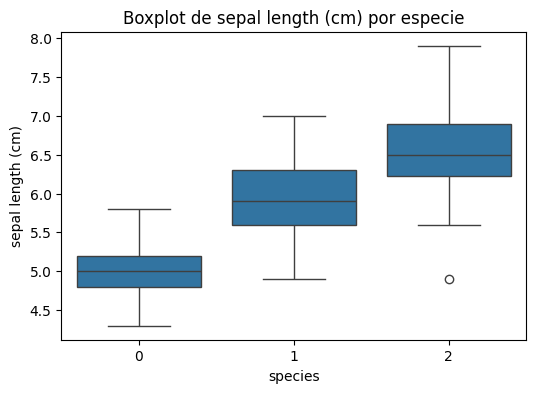

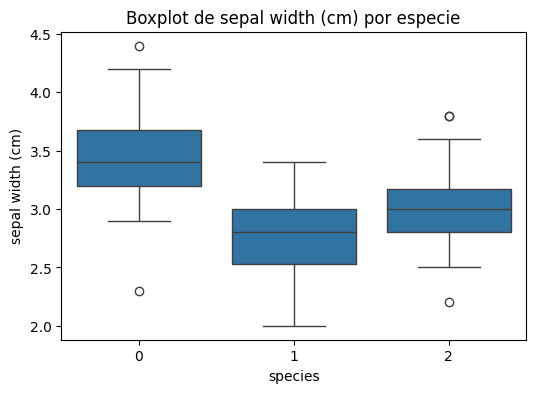

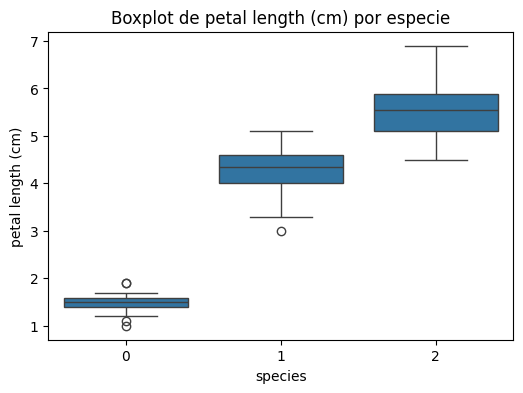

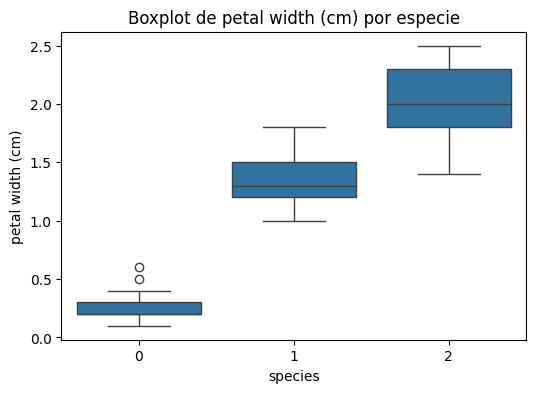

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatterplot
sns.pairplot(pd.concat([X, y], axis=1), hue='species')
plt.show()

# Boxplot de cada variable
for column in X.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=y, y=X[column])
    plt.title(f'Boxplot de {column} por especie')
    plt.show()


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


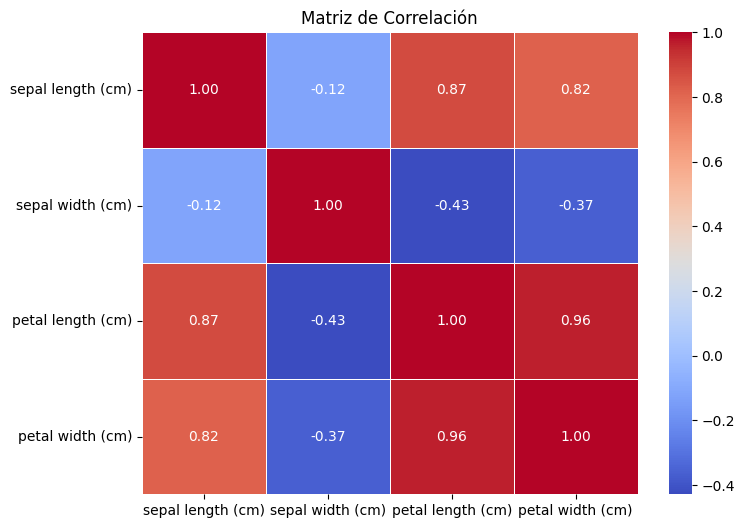

In [5]:
# Matriz de correlación
correlation_matrix = pd.DataFrame(X_scaled, columns=X.columns).corr()

# Visualización de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()


In [6]:
# Descripción estadística del dataset original (antes de escalar)
print(X.describe())


       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [8]:
from sklearn.linear_model import LogisticRegression

# Crear el modelo
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



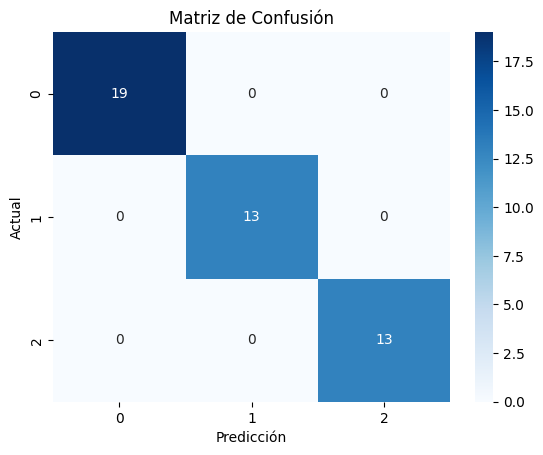

In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluación del rendimiento
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()
